In [9]:
from sklearn.preprocessing import PolynomialFeatures

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ReduceLROnPlateau

from sklearn.datasets import load_digits, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [10]:
X, Y = load_diabetes(return_X_y=True)


In [11]:
pf = PolynomialFeatures(interaction_only=True, include_bias=False)

X = pf.fit_transform(X)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
model = Sequential([
    Dense(1, input_dim=x_train.shape[1]),
    Activation('linear')
])

model.compile(optimizer='SGD',
              loss='mean_squared_error', metrics=['mean_squared_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 56        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 56 (224.00 Byte)
Trainable params: 56 (224.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
hist= model.fit(x_train,
                y_train,
                epochs=100,
                batch_size=10,
                validation_data=[x_test, y_test])

Epoch 1/100
27/27 [==============================] - 2s 19ms/step - loss: 21422.4082 - mean_squared_error: 21422.4082 - val_loss: 10405.0537 - val_mean_squared_error: 10405.0537
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 8285.2148 - mean_squared_error: 8285.2148 - val_loss: 5403.5601 - val_mean_squared_error: 5403.5601
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 4470.5264 - mean_squared_error: 4470.5264 - val_loss: 4092.9902 - val_mean_squared_error: 4092.9902
Epoch 4/100
27/27 [==============================] - 0s 8ms/step - loss: 3375.8086 - mean_squared_error: 3375.8086 - val_loss: 3386.9573 - val_mean_squared_error: 3386.9573
Epoch 5/100
27/27 [==============================] - 0s 8ms/step - loss: 2928.8396 - mean_squared_error: 2928.8396 - val_loss: 3072.6123 - val_mean_squared_error: 3072.6123
Epoch 6/100
27/27 [==============================] - 0s 7ms/step - loss: 2759.7791 - mean_squared_error: 2759.7791 - val_loss: 333

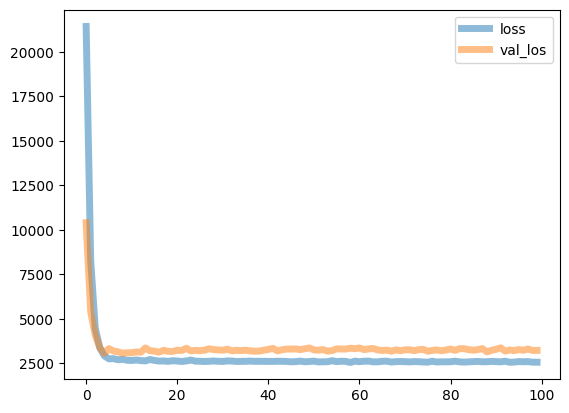

In [15]:
plt.plot(hist.history['loss'], label='loss', lw=5, alpha=0.5)
plt.plot(hist.history['val_loss'], label='val_los', lw=5, alpha=0.5)
plt.legend()

# Por que a métrica de validação começou a "descolar" da métrica de treinamento?
* Over...

In [18]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 3ms/step


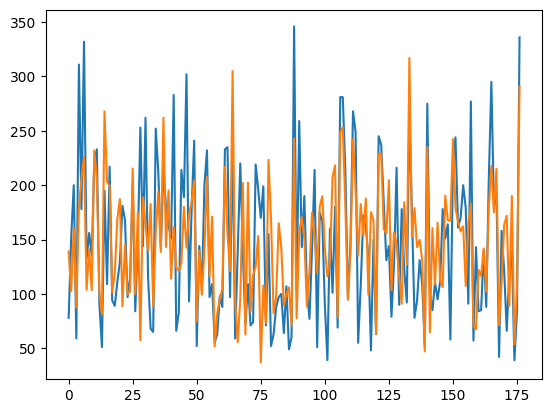

In [19]:
plt.plot(y_test.flatten());
plt.plot(y_pred.flatten());

In [21]:
mean_absolute_percentage_error(y_test, y_pred)

0.37282163190921946